<a href="https://colab.research.google.com/github/JihanSilviR/11181038_Jihan_DM_IF-ITK/blob/main/Quiz_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
data = files.upload()

Saving IRIS.csv to IRIS.csv


In [29]:
data

{'IRIS.csv': b'sepal_length,sepal_width,petal_length,petal_width,species\r\n5.1,3.5,1.4,0.2,Iris-setosa\r\n4.9,3,1.4,0.2,Iris-setosa\r\n4.7,3.2,1.3,0.2,Iris-setosa\r\n4.6,3.1,1.5,0.2,Iris-setosa\r\n5,3.6,1.4,0.2,Iris-setosa\r\n5.4,3.9,1.7,0.4,Iris-setosa\r\n4.6,3.4,1.4,0.3,Iris-setosa\r\n5,3.4,1.5,0.2,Iris-setosa\r\n4.4,2.9,1.4,0.2,Iris-setosa\r\n4.9,3.1,1.5,0.1,Iris-setosa\r\n5.4,3.7,1.5,0.2,Iris-setosa\r\n4.8,3.4,1.6,0.2,Iris-setosa\r\n4.8,3,1.4,0.1,Iris-setosa\r\n4.3,3,1.1,0.1,Iris-setosa\r\n5.8,4,1.2,0.2,Iris-setosa\r\n5.7,4.4,1.5,0.4,Iris-setosa\r\n5.4,3.9,1.3,0.4,Iris-setosa\r\n5.1,3.5,1.4,0.3,Iris-setosa\r\n5.7,3.8,1.7,0.3,Iris-setosa\r\n5.1,3.8,1.5,0.3,Iris-setosa\r\n5.4,3.4,1.7,0.2,Iris-setosa\r\n5.1,3.7,1.5,0.4,Iris-setosa\r\n4.6,3.6,1,0.2,Iris-setosa\r\n5.1,3.3,1.7,0.5,Iris-setosa\r\n4.8,3.4,1.9,0.2,Iris-setosa\r\n5,3,1.6,0.2,Iris-setosa\r\n5,3.4,1.6,0.4,Iris-setosa\r\n5.2,3.5,1.5,0.2,Iris-setosa\r\n5.2,3.4,1.4,0.2,Iris-setosa\r\n4.7,3.2,1.6,0.2,Iris-setosa\r\n4.8,3.1,1.6,0.

**Data Preparation**

In [47]:
dm = pd.read_csv('IRIS.csv')
dm.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [49]:
dm.isna().values.any()

False

In [50]:
dm.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Figure size 576x576 with 0 Axes>

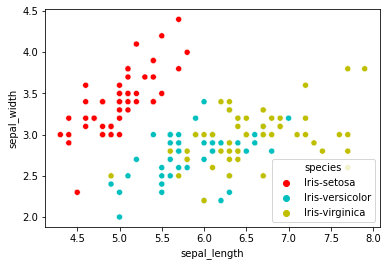

<Figure size 576x576 with 0 Axes>

In [84]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', palette=['r','c','y'], data=dm)
plt.figure(figsize=(8,8))

**Model**

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
x = dm.drop('species', axis = 1)
y = dm['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

Tes dataset yang digunakan adalah sebesar 30%

**Naive Bayes**

In [96]:
from sklearn.naive_bayes import GaussianNB
nbmodel = GaussianNB()
nbmodel.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [97]:
y_predict = nbmodel.predict(x_test)

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print('Akurasi Naive Bayes: '+'{:.1%}'.format(accuracy_score(y_test, y_predict)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
Akurasi Naive Bayes: 100.0%


Hasil akurasi yang diperoleh menggunakan metode Naive Bayes adalah sebesar 100%.

**Decision Tree**

In [100]:
from sklearn.tree import DecisionTreeClassifier
modeldt = DecisionTreeClassifier()
modeldt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [101]:
y_predict = modeldt.predict(x_test)

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print('Akurasi Decision Tree: '+'{:.1%}'.format(accuracy_score(y_test, y_predict)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Akurasi Decision Tree: 97.8%


Hasil akurasi yang diperoleh menggunakan metode Decision Tree adalah sebesar 97,8%.

**Kesimpulan:** Perbandingan antara metode Naive Bayes dan metode Decision Tree telah dilakukan. Hasil yang diperoleh adalah akurasi 100% dengan menggunakan metode Naive Bayes dan akurasi 97,8% menggunakan metode Decision Tree. Dari perbandingan tersebut, metode Naive Bayes adalah hasil terbaik dengan perolehan akurasi sebesar 100%.